In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from recgame.environments import BaseEnvironment
from recgame.recourse import NFeatureRecourse
from recgame.utils import generate_synthetic_data

In [2]:
set_matplotlib_style(16)
# SAVE_PATH = "../assets/multi-agent-dynamic-counterfactual-recourse/analysis/"

# Some variables to define the problem
RNG_SEED = 42
rng = np.random.default_rng(RNG_SEED)
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 10  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = 0.1  # 0.5  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 10  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

df, y, categorical = generate_synthetic_data(N_AGENTS, N_CONTINUOUS, N_CAT, RNG_SEED)

lr = LogisticRegression().fit(df, y)

In [3]:
def data_source_func(n_agents):
    X, _, _ = generate_synthetic_data(
        n_agents=n_agents,
        n_continuous=N_CONTINUOUS,
        n_categorical=N_CAT,
        random_state=rng,
    )
    return X

In [16]:
# Define the necessary components to run simulation
recourse = NFeatureRecourse(lr, n_features=2, categorical=categorical)
environment = BaseEnvironment(
    X=df,
    recourse=recourse,
    data_source_func=data_source_func,
    threshold=N_LOANS,
    threshold_type="absolute",
    adaptation=ADAPTATION,
    behavior_function="continuous_constant",
    growth_rate=NEW_AGENTS,
    growth_rate_type="absolute",
    random_state=RNG_SEED,
)

environment.simulate(50)

BaseEnvironment(X=         f_0       f_1
0   0.601572  0.153339
1   0.750150  0.813522
2  -0.150345  0.065940
3   0.542613  0.394586
4   0.494400  0.215652
..       ...       ...
95  1.074555  0.440160
96  0.372271  0.987148
97  0.130985  0.201758
98  0.714442  0.368465
99  0.498293  0.445519

[100 rows x 2 columns],
                adaptation=0.1, behavior_function='continuous_constant',
                data_source_func=<function data_source_func at 0x7f4e3712ec20>,
                growth_rate=10, growth_rate_type='absolute', random_state=42,
                recourse=NFeatureRecourse(categorical=[],
                                          model=LogisticRegression(),
                                          n_features=2,
                                          threshold=0.6240915164625189),
                threshold=10)

<Axes: title={'center': 'Population scores over 51 time steps'}, xlabel='Step', ylabel='Score'>

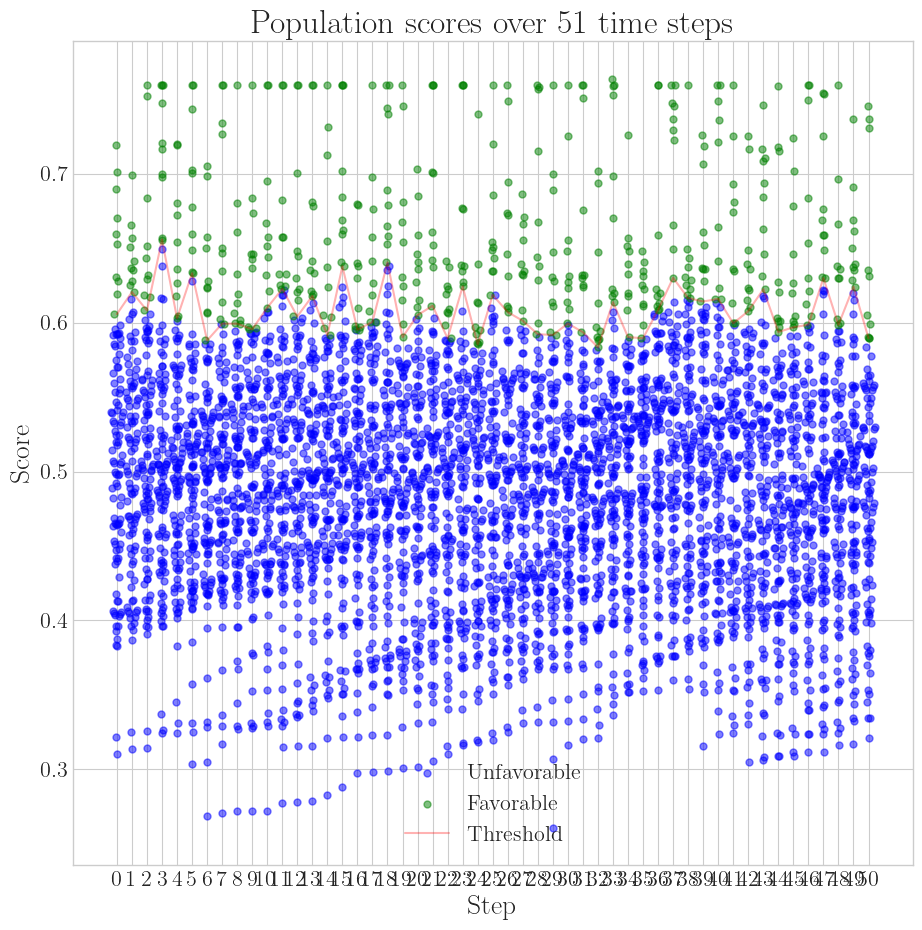

In [17]:
environment.plot.agent_scores()

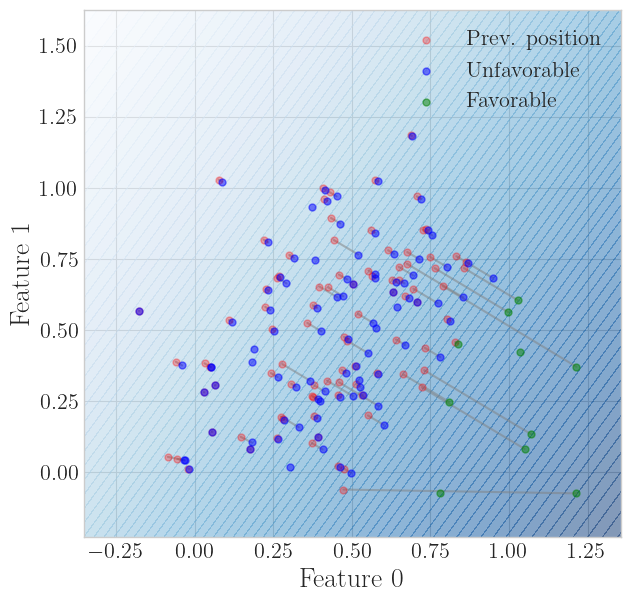

In [14]:
set_matplotlib_style(16, **{"lines.markersize": 5})
fig, ax = plt.subplots(1, 1, figsize=[6.4, 6.4])
ax = environment.plot.scatter(5, title=False, ax=ax)
ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
plt.show()

(array([ 2.,  3., 13., 18., 16., 20., 17.,  5.,  3.,  3.]),
 array([0.31059223, 0.35146955, 0.39234686, 0.43322417, 0.47410149,
        0.5149788 , 0.55585612, 0.59673343, 0.63761074, 0.67848806,
        0.71936537]),
 <BarContainer object of 10 artists>)

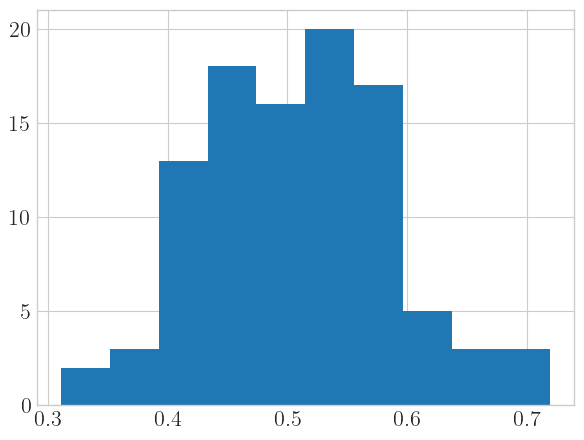

In [7]:
environment.plot.scores_histogram(0)

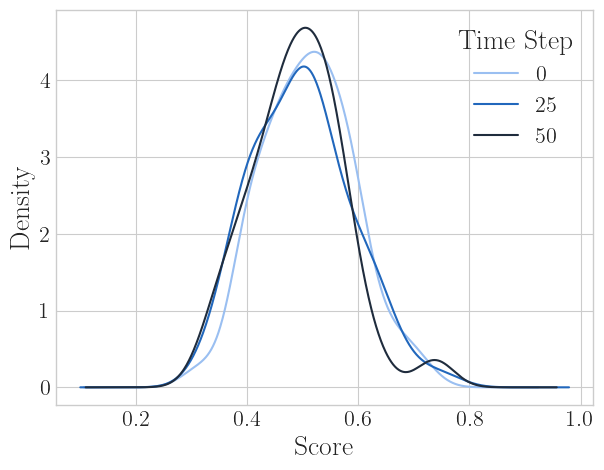

In [18]:
set_matplotlib_style(16)
ax = environment.plot.scores_kde(0, color="#9abff1", legend=True, label="0")
ax = environment.plot.scores_kde(25, color="#2167bc", legend=True, label="25", ax=ax)
ax = environment.plot.scores_kde(50, color="#1f2c3d", legend=True, label="50", ax=ax)
ax.set_xlabel("Score")
ax.legend(title="Time Step")
plt.show()

<Axes: title={'center': 'Population size over 51 time steps'}, xlabel='Step', ylabel='Number of agents'>

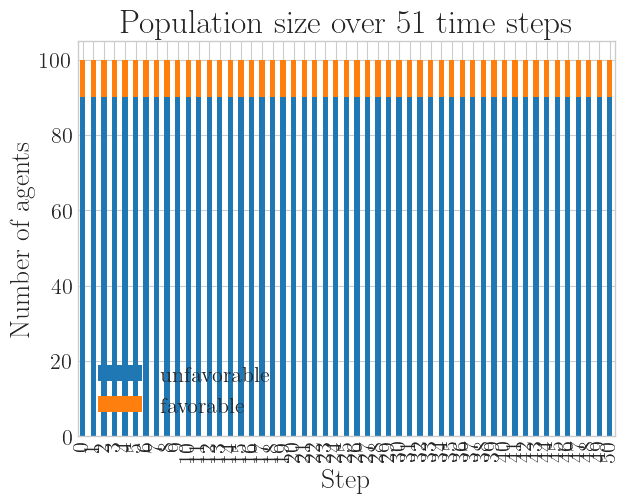

In [19]:
environment.plot.population_size()

In [20]:
environment.analysis.success_rate(1, 10)

array([0.81818182, 1.        , 0.71428571, 1.        , 0.9       ,
       1.        , 0.9       , 1.        , 1.        ])

In [21]:
environment.analysis.threshold_drift(1, 10)

array([ 2.44125646e-02, -1.99273112e-02,  7.83232670e-02, -8.06739603e-02,
        5.01477918e-02, -7.12429119e-02,  1.91708624e-02, -4.61152458e-06,
       -6.24571248e-03,  2.43329332e-02])

In [22]:
steps_info = environment.analysis.steps_info()
steps_info.tail(10)

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba,moving_agent_proba,success_proba
41,90.0,6.0,10.0,1.000000,0.599524,-0.026540,10.0,0.10,0.008396,0.713437
42,90.0,9.0,10.0,1.000000,0.607669,0.013584,10.0,0.09,0.002681,0.708491
43,90.0,10.0,10.0,0.800000,0.622380,0.024209,10.0,0.08,0.003910,0.667399
44,90.0,4.0,10.0,1.000000,0.593676,-0.046119,10.0,0.12,0.000585,0.731721
45,90.0,8.0,10.0,1.000000,0.596801,0.005263,10.0,0.11,0.011179,0.555830
46,90.0,9.0,10.0,0.888889,0.598602,0.003017,10.0,0.10,0.017311,0.460742
47,90.0,11.0,10.0,0.636364,0.629911,0.052303,10.0,0.07,0.000323,0.664952
48,90.0,3.0,10.0,1.000000,0.598488,-0.049885,10.0,0.10,0.006288,0.520513
49,90.0,9.0,10.0,0.777778,0.624092,0.042781,10.0,0.08,0.005073,0.526206
50,90.0,3.0,10.0,1.000000,0.589530,-0.055380,10.0,0.18,0.006627,0.480172


,success_proba,threshold_drift
success_proba,1.000000,0.069856
threshold_drift,0.069856,1.000000


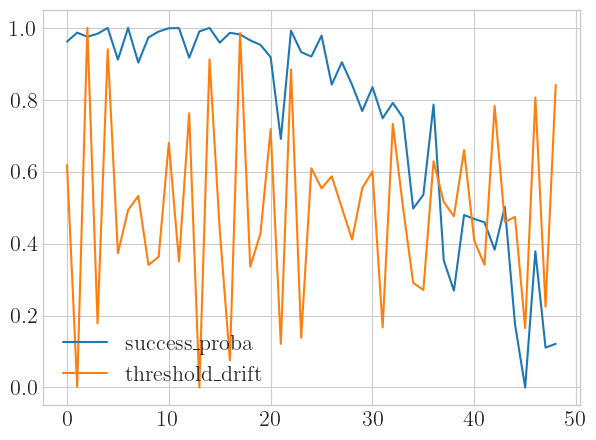

In [23]:
predictions = pd.concat(
    [
        steps_info.success_proba.iloc[:-1].reset_index(drop=True),
        steps_info.threshold_drift.iloc[1:].reset_index(drop=True) * -1,
    ],
    axis=1,
).astype(float)
((predictions - predictions.min()) / (predictions.max() - predictions.min())).iloc[
    :50
].plot.line()
predictions.corr()

In [24]:
steps_info.astype(float).corr().round(2)

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba,moving_agent_proba,success_proba
n_adapted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_candidates,NaN,1.00,NaN,-0.81,0.70,0.88,NaN,-0.65,-0.14,0.14
favorable_outcomes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
success_rate,NaN,-0.81,NaN,1.00,-0.66,-0.74,NaN,0.55,0.07,-0.12
threshold,NaN,0.70,NaN,-0.66,1.00,0.79,NaN,-0.84,-0.32,0.10
threshold_drift,NaN,0.88,NaN,-0.74,0.79,1.00,NaN,-0.69,-0.24,0.09
new_agents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_agents_proba,NaN,-0.65,NaN,0.55,-0.84,-0.69,NaN,1.00,0.28,-0.04
moving_agent_proba,NaN,-0.14,NaN,0.07,-0.32,-0.24,NaN,0.28,1.00,-0.04
success_proba,NaN,0.14,NaN,-0.12,0.10,0.09,NaN,-0.04,-0.04,1.00


In [26]:
agents_info = environment.analysis.agents_info()
agents_info

,entered_step,n_adaptations,favorable_step,original_score,final_score,n_failures
0,0,1,1.0,0.592102,0.656627,0
1,0,6,6.0,0.519861,0.606329,0
2,0,15,15.0,0.417626,0.759316,0
3,0,3,3.0,0.537543,0.655776,0
4,0,3,3.0,0.555235,0.656856,0
...,...,...,...,...,...,...
595,50,0,NaN,0.502036,NaN,0
596,50,0,50.0,0.745145,0.745145,0
597,50,0,NaN,0.382580,NaN,0
598,50,0,NaN,0.515575,NaN,0


In [27]:
agents_info.corr()

,entered_step,n_adaptations,favorable_step,original_score,final_score,n_failures
entered_step,1.000000,-0.238478,0.874896,-0.006945,-0.025916,-0.126987
n_adaptations,-0.238478,1.000000,0.246868,-0.780067,-0.022946,0.086636
favorable_step,0.874896,0.246868,1.000000,-0.204580,-0.037448,-0.016171
original_score,-0.006945,-0.780067,-0.204580,1.000000,0.118587,-0.059494
final_score,-0.025916,-0.022946,-0.037448,0.118587,1.000000,0.291617
n_failures,-0.126987,0.086636,-0.016171,-0.059494,0.291617,1.000000


Text(0, 0.5, '\\# Failures (mean)')

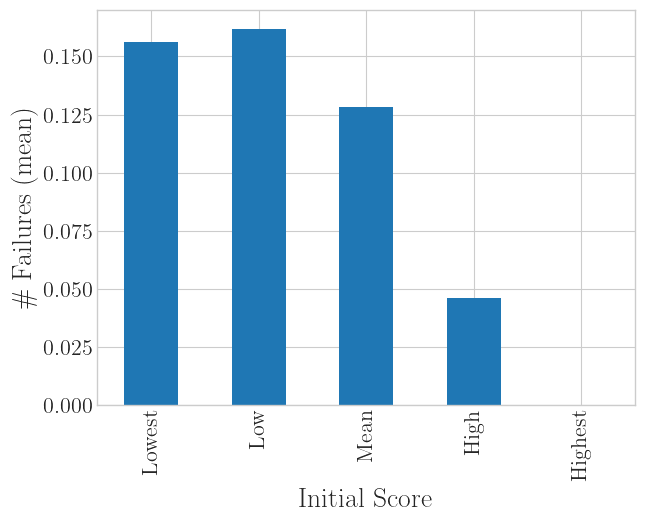

In [28]:
from collections import Counter

# agents_info.plot.bar("n_failures", "n_adaptations")
agents_info_ = agents_info.copy()

agents_info_ = agents_info_[
    ~agents_info_.favorable_step.isna() | agents_info_.n_failures > 0
]
agents_info_["Initial Score"] = pd.cut(
    agents_info_["original_score"],
    5,
    labels=["Lowest", "Low", "Mean", "High", "Highest"],
)
# agents_info_["success_rate"] =

agents_info_.groupby(["Initial Score"]).mean()[
    ["n_adaptations", "final_score", "n_failures"]
]

ax = agents_info_.groupby(["Initial Score"]).mean()["n_failures"].plot.bar()
ax.set_ylabel("\# Failures (mean)")